In [2]:
import os
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import json

class JSONEncoder(json.JSONEncoder):
    def default(self, obj):
        if hasattr(obj, 'to_json'):
            return obj.to_json(orient='records')
        return json.JSONEncoder.default(self, obj)
    
directory_path = 'mood_datas'

# check if directory exists
if not os.path.exists(directory_path):
    print(f"The directory {directory_path} does not exist.")
else:
    if not os.listdir(directory_path):
        print(f"The directory {directory_path} is empty.")
    else:
        print(f"Files in the directory {directory_path}:")
        print(os.listdir(directory_path))

all_files = os.listdir(directory_path)

mood_m_files = [file for file in all_files if file.endswith('_M')]
mood_a_files = [file for file in all_files if file.endswith('_A')]

# parse JSON and extract values
def parse_mood_values(mood_value_str):
    mood_value_dict = json.loads(mood_value_str.replace("'", "\""))  # Replace single quotes with double quotes for valid JSON
    valence = mood_value_dict['valence']['value']
    valence_confidence = mood_value_dict['valence']['confidence']
    attention = mood_value_dict['attention']['value']
    attention_confidence = mood_value_dict['attention']['confidence']
    return valence, valence_confidence, attention, attention_confidence

data_frames = {}

for m_file in mood_m_files:
    base_name = m_file.replace('_M', '')
    a_file = base_name + '_A'
    
    if a_file in mood_a_files:
        path_to_m_file = os.path.join(directory_path, m_file)
        path_to_a_file = os.path.join(directory_path, a_file)
        
        data_m = pd.read_csv(path_to_m_file)
        data_a = pd.read_csv(path_to_a_file)
        
        data_m["Timestamp"] = data_m["Timestamp"] - data_m["Timestamp"][0]
        data_a["Timestamp"] = data_a["Timestamp"] - data_a["Timestamp"][0]
        
        # extract values
        data_m[['valence', 'valence_confidence', 'attention', 'attention_confidence']] = data_m['MoodValue'].apply(
            lambda x: pd.Series(parse_mood_values(x))
        )
        data_a[['valence', 'valence_confidence', 'attention', 'attention_confidence']] = data_a['MoodValue'].apply(
            lambda x: pd.Series(parse_mood_values(x))
        )
        
        data_m.drop(['MoodValue', 'Unnamed: 0'], axis=1, inplace=True)
        data_a.drop(['MoodValue', 'Unnamed: 0'], axis=1, inplace=True)
        
        data_frames[base_name.replace("mood_data_", "") + '_M'] = data_m
        data_frames[base_name.replace("mood_data_", "") + '_A'] = data_a

with open("mood_datas.json", "w") as fp:
    json.dump(data_frames, fp, cls=JSONEncoder)
print(data_frames)

data_frames = json.load(open('mood_datas.json'))
data_frames

ModuleNotFoundError: No module named 'pandas'

## Mood Data Analysis
Let's plot the Valence and Attention values from the mood data.

[-0.02750941 -0.02115302  0.00092742 -0.04991219  0.00027977 -0.00744489
  0.03176428  0.05617582  0.06642307  0.0685849   0.09983805  0.03983741
  0.00253384  0.01923562  0.01410524  0.08457095  0.07148387  0.04614976
  0.01174189  0.0253878   0.02433906 -0.00231467 -0.00203135 -0.03377048
  0.04944183  0.03894976  0.05759694  0.01739244 -0.00126075 -0.04339426
 -0.04380033 -0.05182127 -0.01952716 -0.02951137 -0.02496325 -0.00744452
  0.0417866   0.00202182  0.00807083  0.01840764  0.05634813  0.07292529
  0.04715439  0.01645619  0.03827334  0.0025624  -0.03163654 -0.01107297
  0.0714957   0.04303114 -0.02637251 -0.02699533 -0.04990712 -0.02000037
 -0.00554422 -0.0196783  -0.00603093 -0.06952233]
[-7.89834956e-03 -7.46560022e-03 -9.88706897e-03 -7.28618105e-03
 -1.02305914e-02 -2.15000858e-03 -1.36200458e-02 -4.89486356e-03
  1.35393359e-02  1.21432329e-02  1.73604627e-02  2.35518465e-02
  1.56661205e-02  1.33459772e-02  3.10955470e-03  1.81487960e-02
  2.67843373e-02  5.12641817e-03 

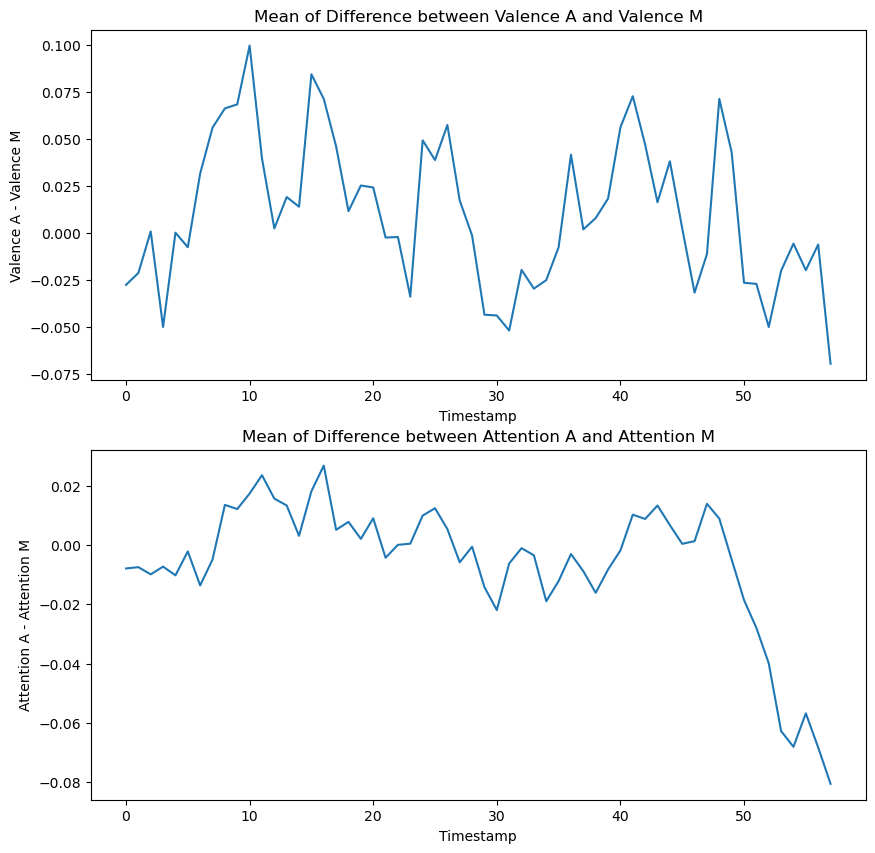

In [11]:
average_valence = np.empty((60, 58))
average_attention = np.empty((60, 58))
row=0

for base_name in set(name.replace('_M', '').replace('_A', '') for name in data_frames):
    df_m = data_frames[base_name + '_M']
    df_a = data_frames[base_name + '_A']

    average_valence[row] = [ast.literal_eval(df_a[1:-1])[i]["valence"] - ast.literal_eval(df_m[1:-1])[i]["valence"] for i in range(0, 58)]
    average_attention[row] = [ast.literal_eval(df_a[1:-1])[i]["attention"] - ast.literal_eval(df_m[1:-1])[i]["attention"] for i in range(0, 58)]
    row += 1
  
print(np.mean(average_valence, axis=0))
print(np.mean(average_attention, axis=0))

fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].plot([i for i in range(58)], np.mean(average_valence, axis=0))
axs[0].set_title('Mean of Difference between Valence A and Valence M')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Valence A - Valence M')

axs[1].plot([i for i in range(58)], np.mean(average_attention, axis=0))
axs[1].set_title('Mean of Difference between Attention A and Attention M')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Attention A - Attention M')
plt.show()

In [27]:
import os
import pandas as pd
import json

directory_path = 'mood_datas'

# Check if the directory exists
if not os.path.exists(directory_path):
    print(f"The directory {directory_path} does not exist.")


all_files = os.listdir(directory_path)

mood_m_files = [file for file in all_files if file.endswith('_M')]
mood_a_files = [file for file in all_files if file.endswith('_A')]

def parse_mood_values(mood_value_str):
    mood_value_dict = json.loads(mood_value_str.replace("'", "\""))  # Replace single quotes with double quotes for valid JSON
    valence = mood_value_dict['valence']['value']
    valence_confidence = mood_value_dict['valence']['confidence']
    attention = mood_value_dict['attention']['value']
    attention_confidence = mood_value_dict['attention']['confidence']
    return valence, valence_confidence, attention, attention_confidence

data_frames = {}

# Process each pair of files
for m_file in mood_m_files:
    base_name = m_file.replace('_M', '')
    a_file = base_name + '_A'
    
    if a_file in mood_a_files:
        path_to_m_file = os.path.join(directory_path, m_file)
        path_to_a_file = os.path.join(directory_path, a_file)
        
        # Load the data
        data_m = pd.read_csv(path_to_m_file)
        data_a = pd.read_csv(path_to_a_file)
        
        # extract values
        data_m[['valence', 'valence_confidence', 'attention', 'attention_confidence']] = data_m['MoodValue'].apply(
            lambda x: pd.Series(parse_mood_values(x))
        )
        data_a[['valence', 'valence_confidence', 'attention', 'attention_confidence']] = data_a['MoodValue'].apply(
            lambda x: pd.Series(parse_mood_values(x))
        )
        
        data_m.drop(['MoodValue', 'Unnamed: 0'], axis=1, inplace=True)
        data_a.drop(['MoodValue', 'Unnamed: 0'], axis=1, inplace=True)
        
        data_frames[base_name + '_M'] = data_m
        data_frames[base_name + '_A'] = data_a




Levene's test p-value:  0.7755055300838524
Equal variances assumed for valence
Levene's test p-value:  0.56074881670751
Equal variances assumed for attention


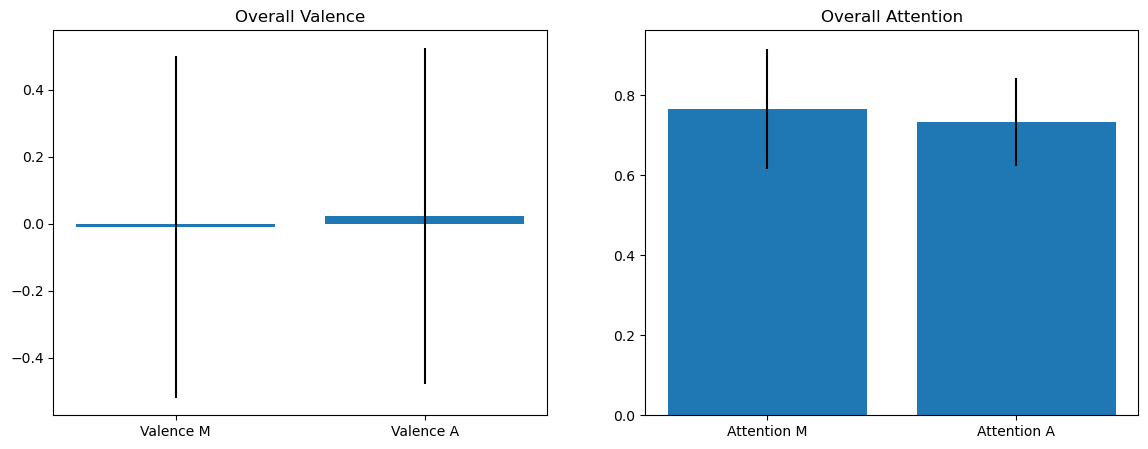

Valence t-test results: TtestResult(statistic=-0.17982723451368976, pvalue=0.858422120453349, df=32.0)
Attention t-test results: TtestResult(statistic=0.7154030508104979, pvalue=0.4795477490641221, df=32.0)


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np

overall_valence = {'M': [], 'A': []}
overall_attention = {'M': [], 'A': []}

# get mean valence and attention
for base_name in set(name[:-2] for name in data_frames):
    df_m = data_frames[base_name + '_M']
    df_a = data_frames[base_name + '_A']
    
    overall_valence['M'].append(df_m['valence'].mean())
    overall_valence['A'].append(df_a['valence'].mean())
    overall_attention['M'].append(df_m['attention'].mean())
    overall_attention['A'].append(df_a['attention'].mean())
    
# test for equal variance


res = stats.levene(overall_valence['M'], overall_valence['A'])
print("Levene's test p-value: ", res.pvalue)
alpha = 0.05
if res.pvalue < alpha:
    print('Variances significantly different for valence')
else:
    print('Equal variances assumed for valence')
    
res = stats.levene(overall_attention['M'], overall_attention['A'])
print("Levene's test p-value: ", res.pvalue)
alpha = 0.05
if res.pvalue < alpha:
    print('Variances significantly different for attention')
else:
    print('Equal variances assumed for attention')

# t tests
valence_ttest = ttest_ind(overall_valence['M'], overall_valence['A'])
attention_ttest = ttest_ind(overall_attention['M'], overall_attention['A'])

# plot
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].bar(['Valence M', 'Valence A'], [np.mean(overall_valence['M']), np.mean(overall_valence['A'])], 
           yerr=[np.std(overall_valence['M']), np.std(overall_valence['A'])])
axs[0].set_title('Overall Valence')

axs[1].bar(['Attention M', 'Attention A'], [np.mean(overall_attention['M']), np.mean(overall_attention['A'])], 
           yerr=[np.std(overall_attention['M']), np.std(overall_attention['A'])])
axs[1].set_title('Overall Attention')

plt.show()

print(f"Valence t-test results: {valence_ttest}")
print(f"Attention t-test results: {attention_ttest}")


# Add in survey data

In [7]:
# preprocessing
survey_df = pd.read_csv('survey_data.csv')

survey_df.columns = ["timestamp", 'ID', 'pepper', 'engagement', 'enjoyment', 'notes_lacking', 'notes_enjoyment']


survey_df['ID'] = survey_df['ID'].str.upper()

survey_df.loc[0, 'pepper'] = 'Pepper M'
survey_df.loc[1, 'ID'] = 'XUM1U'

survey_df['ID'] = survey_df['ID'].str.strip()

survey_df['ID'][survey_df['pepper']=='Pepper M'] = 'mood_data_' + survey_df['ID'] + '_M'
survey_df['ID'][survey_df['pepper']=='Pepper A'] = 'mood_data_' + survey_df['ID'] + '_A'

survey_df


/var/folders/tz/29vlxl5n4rd275nfkrr7f9440000gn/T/ipykernel_14911/2805892382.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['ID'][survey_df['pepper']=='Pepper M'] = 'mood_data_' + survey_df['ID'] + '_M'
/var/folders/tz/29vlxl5n4rd275nfkrr7f9440000gn/T/ipykernel_14911/2805892382.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['ID'][survey_df['pepper']=='Pepper A'] = 'mood_data_' + survey_df['ID'] + '_A'


,timestamp,ID,pepper,engagement,enjoyment,notes_lacking,notes_enjoyment
0,2024/04/04 6:57:38 PM MDT,mood_data_XUM1U_M,Pepper M,2,4,I zoomed out at first because the way pepper t...,NaN
1,2024/04/04 7:09:51 PM MDT,mood_data_XUM1U_A,Pepper A,4,5,NaN,Pepper looks really cute with the hand gestures
2,2024/04/04 8:30:18 PM MDT,mood_data_OX4SS_M,Pepper M,4,4,Talk too fast hard to understand to tone,N/a
3,2024/04/04 8:30:43 PM MDT,mood_data_OX4SS_A,Pepper A,5,5,NaN,NaN
4,2024/04/08 4:59:51 PM MDT,mood_data_JAT8H_A,Pepper A,4,4,NaN,I enjoyed the various tones that the story was...
5,2024/04/08 5:03:07 PM MDT,mood_data_JAT8H_M,Pepper M,3,3,There was lack of expression in the story tell...,NaN
6,2024/04/08 9:07:33 PM MDT,mood_data_REQGJ_A,Pepper A,4,4,NaN,"I enjoyed the enthusiasm in the storytelling, ..."
7,2024/04/08 9:14:10 PM MDT,mood_data_REQGJ_M,Pepper M,3,3,NaN,"I enjoyed the story, it was quick and whimsica..."
8,2024/04/08 9:20:10 PM MDT,mood_data_1TRNZ_M,Pepper M,2,2,"Seemed lackluster, almost like I was being giv...",NaN
9,2024/04/08 9:22:36 PM MDT,mood_data_1TRNZ_A,Pepper A,4,4,NaN,"Was easier to focus on pepper with movement, l..."


In [8]:
list(survey_df[survey_df['pepper']=='Pepper M']['notes_lacking'])
list(survey_df[survey_df['pepper']=='Pepper M']['notes_enjoyment'])
list(survey_df[survey_df['pepper']=='Pepper A']['notes_lacking'])
list(survey_df[survey_df['pepper']=='Pepper A']['notes_enjoyment'])


['Pepper looks really cute with the hand gestures',
 nan,
 'I enjoyed the various tones that the story was told in, it helped me stay engaged to hear what was coming up next in the story.',
 'I enjoyed the enthusiasm in the storytelling, but I would say the main reason I was engaged was how random/surprising each turn/line of the story was.',
 'Was easier to focus on pepper with movement, low-key forgot I was interacting with a robot ',
 'good intonation and tone change, able to keep attention on self with expressive hand signs and moving their body while they speak. physically and emotionally expressive with they way they interact with the listener. prefer the other one this one has too much going on :v',
 'I enjoyed the expressiveness of the robot as it told the story.',
 'Talked with lots of expressions (E.g. Using hands, moving body)',
 'Easier to understand, the robot sounded more lively. More movement than the other robot',
 'Great hand gestures better voice',
 'That a robot was 

Text(0, 0.5, 'Engagement score')

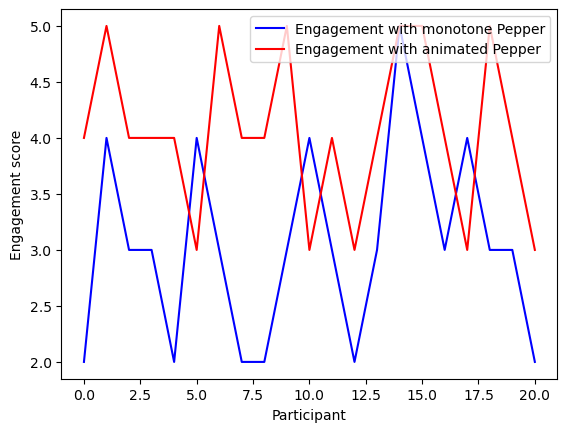

In [10]:

pepper_m_engagement_m = survey_df[survey_df['pepper']=='Pepper M']['engagement']
pepper_m_engagement_m

plt.plot(list(range(0, len(pepper_m_engagement_m))), pepper_m_engagement_m, 'b', label="Engagement with monotone Pepper")
pepper_m_engagement_a = survey_df[survey_df['pepper']=='Pepper A']['engagement']
pepper_m_engagement_a

plt.plot(list(range(0, len(pepper_m_engagement_a))), pepper_m_engagement_a, 'r', label="Engagement with animated Pepper")
plt.legend(loc="upper right")
plt.xlabel("Participant")
plt.ylabel("Engagement score")

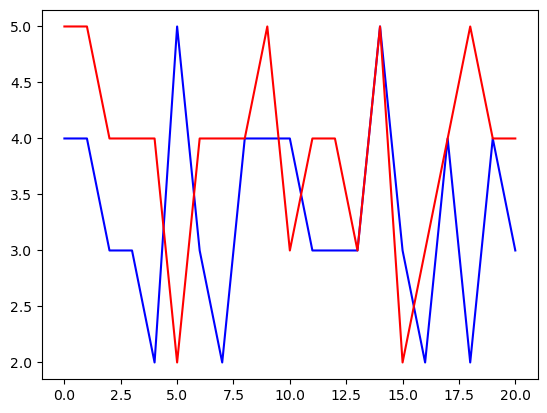

In [11]:

pepper_m_enjoyment_m = survey_df[survey_df['pepper']=='Pepper M']['enjoyment']
pepper_m_enjoyment_m

plt.plot(list(range(0, len(pepper_m_enjoyment_m))), pepper_m_enjoyment_m, 'b')
pepper_m_enjoyment_a = survey_df[survey_df['pepper']=='Pepper A']['enjoyment']
pepper_m_enjoyment_a

plt.plot(list(range(0, len(pepper_m_enjoyment_a))), pepper_m_enjoyment_a, 'r')


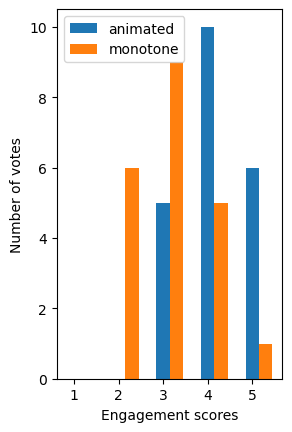

In [12]:
# bar plot for engagement

a_engagement = [0, 0, 5, 10, 6]
 
m_engagement = [0, 6, 9, 5, 1]
 
scores = [1, 2, 3, 4, 5]
width1 = 0.3
 
# Create the first subplot
plt.subplot(1, 2, 2)
plt.bar(scores, a_engagement, width=width1, label="animated")
plt.bar(np.array(scores)+width1, m_engagement, width=width1, label="monotone")

plt.legend(loc="upper left")
plt.xlabel("Engagement scores")
plt.ylabel("Number of votes")
plt.xticks(np.arange(1, 6))
# Display the plot
plt.show()

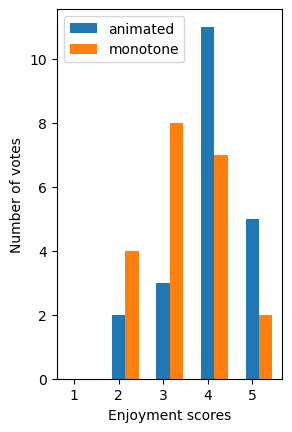

In [13]:
# bar plot for enjoyment

a_enjoyment = [0, 2, 3, 11, 5]
 
m_enjoyment = [0, 4, 8, 7, 2]
 
scores = [1, 2, 3, 4, 5]
width1 = 0.3
 
# Create the first subplot
plt.subplot(1, 2, 2)
plt.bar(scores, a_enjoyment, width=width1, label="animated")
plt.bar(np.array(scores)+width1, m_enjoyment, width=width1, label="monotone")

plt.legend(loc="upper left")
plt.xlabel("Enjoyment scores")
plt.ylabel("Number of votes")
plt.xticks(np.arange(1, 6))
# Display the plot
plt.show()



In [14]:
survey_df[survey_df['pepper']=='Pepper A']['enjoyment'].value_counts()
survey_df[survey_df['pepper']=='Pepper M']['enjoyment'].value_counts()

3    8
4    7
2    4
5    2
Name: enjoyment, dtype: int64

# Statistical Test for Survey Data


In [19]:
# engagement
import scipy.stats as stats

m_engagement = list(survey_df[survey_df['pepper']=='Pepper A']['engagement'])
a_engagement = list(survey_df[survey_df['pepper']=='Pepper M']['engagement'])

res = stats.levene(m_engagement, a_engagement)
print("Levene's test p-value: ", res.pvalue)
alpha = 0.05
if res.pvalue < alpha:
    print('Variances significantly different')
else:
    print('Equal variances assumed')


Levene's test p-value:  0.579266666825313
Equal variances assumed


In [20]:
t_statistic, p_value = stats.ttest_ind(m_engagement, a_engagement)
print(f'T-statistic: {t_statistic}, P-value: {p_value}')


if p_value < alpha:
    print('The difference in mean for engagement is statistically significant.')
else:
    print('There is no statistically significant difference in means.')

T-statistic: 4.026566191448695, P-value: 0.000245441814465264
The difference in mean for engagement is statistically significant.


In [21]:
# enjoyment

m_enjoyment = list(survey_df[survey_df['pepper']=='Pepper A']['enjoyment'])
a_enjoyment = list(survey_df[survey_df['pepper']=='Pepper M']['enjoyment'])

res = stats.levene(m_enjoyment, a_enjoyment)
print("Levene's test p-value: ", res.pvalue)
alpha = 0.05
if res.pvalue < alpha:
    print('Variances significantly different')
else:
    print('Equal variances assumed')

Levene's test p-value:  0.48718415047067265
Equal variances assumed


In [22]:
t_statistic, p_value = stats.ttest_ind(m_enjoyment, a_enjoyment)
print(f'T-statistic: {t_statistic}, P-value: {p_value}')


if p_value < alpha:
    print('The difference in mean for enjoyment is statistically significant.')
else:
    print('There is no statistically significant difference in means.')

T-statistic: 2.0549632357522243, P-value: 0.04645375545202567
The difference in mean for enjoyment is statistically significant.


# Word frequency graph

In [23]:
import math

m_lacking = list(survey_df[survey_df['pepper']=='Pepper M']['notes_lacking'])
m_enjoyment = list(survey_df[survey_df['pepper']=='Pepper M']['notes_enjoyment'])
a_lacking = list(survey_df[survey_df['pepper']=='Pepper A']['notes_lacking'])
a_enjoyment = list(survey_df[survey_df['pepper']=='Pepper A']['notes_enjoyment'])

for i in range(len(m_enjoyment)):
    if m_enjoyment[i] != m_enjoyment[i]: # that means it's nan
        m_enjoyment[i] = "N/a"
        
for i in range(len(m_lacking)):
    if m_lacking[i] != m_lacking[i]: # that means it's nan
        m_lacking[i] = "N/a"

for i in range(len(a_lacking)):
    if a_lacking[i] != a_lacking[i]: # that means it's nan
        a_lacking[i] = "N/a"   
        
for i in range(len(a_enjoyment)):
    if a_enjoyment[i] != a_enjoyment[i]: # that means it's nan
        a_enjoyment[i] = "N/a"
        
word_freq_m_lacking = {}
word_freq_m_enjoyment = {}
word_freq_a_lacking = {}
word_freq_a_enjoyment = {}
        
# get frequencies
for s in m_lacking:
    s = s.split(" ")
    for w in s:
        if w in word_freq_m_lacking:
            word_freq_m_lacking[w] += 1
        else:
            word_freq_m_lacking[w] = 1
            
for s in m_enjoyment:
    s = s.split(" ")
    for w in s:
        if w in word_freq_m_enjoyment:
            word_freq_m_enjoyment[w] += 1
        else:
            word_freq_m_enjoyment[w] = 1
            
for s in a_lacking:
    s = s.split(" ")
    for w in s:
        if w in word_freq_a_lacking:
            word_freq_a_lacking[w] += 1
        else:
            word_freq_a_lacking[w] = 1
            
for s in a_enjoyment:
    s = s.split(" ")
    for w in s:
        if w in word_freq_a_enjoyment:
            word_freq_a_enjoyment[w] += 1
        else:
            word_freq_a_enjoyment[w] = 1

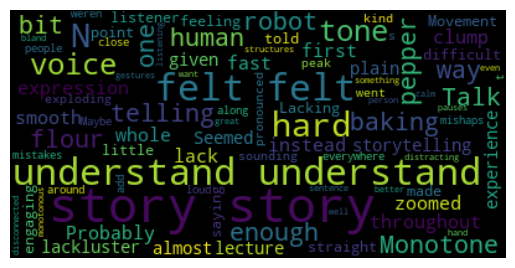

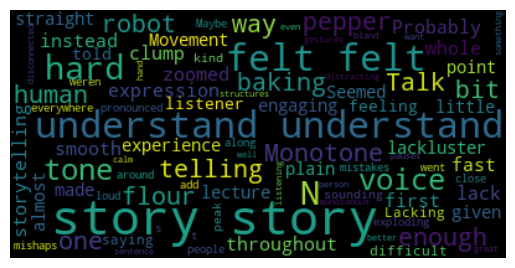

In [24]:
from wordcloud import WordCloud

text = " ".join([(k + " ")*v for k,v in word_freq_m_lacking.items()])

# Generate a word cloud image
wordcloud = WordCloud().generate(text)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

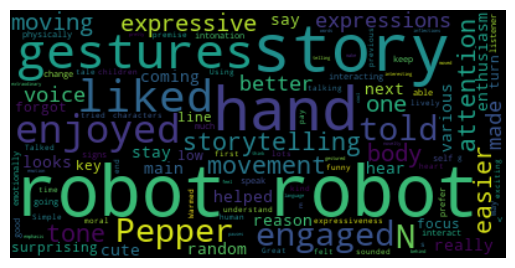

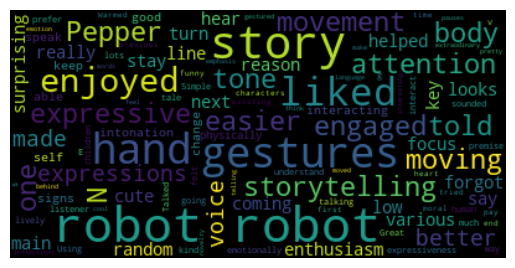

In [25]:
text = " ".join([(k + " ")*v for k,v in word_freq_a_enjoyment.items()])

# Generate a word cloud image
wordcloud = WordCloud().generate(text)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()